In [18]:
import numpy as np
import math
from abc import ABC, abstractmethod
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
import pandas as pd

In [19]:
rng = default_rng(seed=42)

# Resources :

t tests :
- https://blog.minitab.com/en/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests
- https://www.youtube.com/watch?v=CIbJSX-biu0

F tests :
- https://www.youtube.com/watch?v=hceIXHjQPdk
- https://timeseriesreasoning.com/contents/f-test-for-regression-analysis/
- https://www.youtube.com/watch?v=jjAoQhf40SQ
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.f_test.html

Comparing Models :
- https://www.datasciencecentral.com/profiles/blogs/comparing-model-evaluation-techniques-part-3-regression-models



# Linear Regression

In [20]:
def regression(Xtrain, Xtest, ytrain, ytest) :
    reg = LinearRegression().fit(Xtrain, ytrain)
    
    return reg.coef_, reg.intercept_, reg.score(Xtest, ytest)

#  Data
We use auto-mpg dataset to work with

In [21]:
mpg = pd.read_csv('./auto-mpg.csv', na_values=['NA','?'])

In [22]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Pre Processing Dataset

In [23]:
print(mpg.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


In [24]:
mpg['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [25]:
cars = mpg['name']
mpg.drop('name',1,inplace=True)
## replacing NA values
med = mpg['horsepower'].median()
mpg['horsepower'] = mpg['horsepower'].fillna(med) 

/var/folders/vr/pdn9mc513_g7d3f2pzq7z8v00000gn/T/ipykernel_21381/1545913390.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mpg.drop('name',1,inplace=True)


In [26]:
## Selecting covariates columns
covariates = []
for x in mpg.columns:
    if x != 'mpg':
        covariates.append(x)

print(covariates)

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


In [27]:
## Getting data
X = mpg[covariates].values
y = mpg['mpg'].values

print('X shape', X.shape)
print('y shape', y.shape)

X shape (398, 7)
y shape (398,)


In [28]:
#split data into testing and training
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## How to compare nested models ?
- Lasso regression for feature selection
- Compare model result
- Run t-test on one additional covariate
- F-test
- Anova 

# Using Laso Regression

We can also use Laso regression on scaled data and plot coefficient to see which features gets dropped

In [29]:
from sklearn.preprocessing import StandardScaler


In [30]:
scaler = StandardScaler()
Xs = X
for i in range(X.shape[1]) :
    Xs[:,i]= scaler.fit_transform(X[:,i].reshape(-1, 1))[:,0]
   


Final score (RMSE): 3.3347332384706325


,coef,positive
weight,-4.872291,False
horsepower,-0.180388,False
cylinders,-0.000000,True
displacement,-0.000000,True
acceleration,0.069934,True
origin,0.888632,True
year,2.672853,True


Intercept: 23.51457286432161


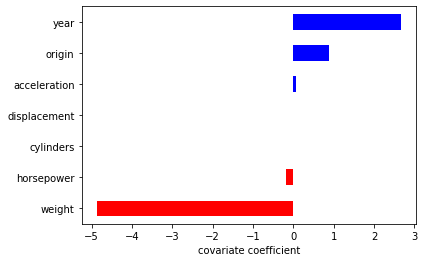

In [55]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn import metrics

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print("Intercept: {}".format(intercept))
    plt.xlabel('covariate coefficient')
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(Xs,y)
# Predict
pred = regressor.predict(Xs)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE): {}".format(score))

names = list(mpg.columns.values)
names.remove("mpg")
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)



Final score (RMSE): 3.304598354789569


,coef,positive
weight,-5.526821,False
cylinders,-0.508490,False
horsepower,-0.395510,False
acceleration,0.242891,True
origin,1.094515,True
displacement,1.532179,True
year,2.775988,True


Intercept: 23.51457286432161


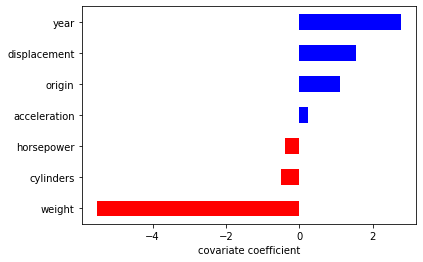

In [56]:
# Lasso with different alpha value

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.01)

# Fit/train LASSO
regressor.fit(Xs,y)
# Predict
pred = regressor.predict(Xs)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE): {}".format(score))

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)



Final score (RMSE): 3.5939307435083205


,coef,positive
weight,-4.645359,False
horsepower,-0.056904,False
cylinders,-0.000000,True
displacement,-0.000000,True
acceleration,0.000000,True
origin,0.308946,True
year,2.018387,True


Intercept: 23.51457286432161


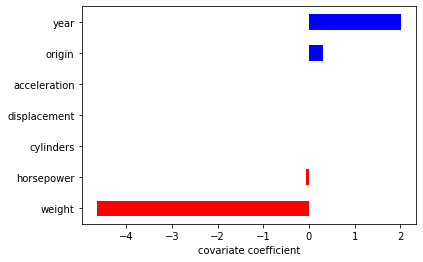

In [58]:
# Create linear regression
regressor = Lasso(random_state=0,alpha=1)

# Fit/train LASSO
regressor.fit(Xs,y)
# Predict
pred = regressor.predict(Xs)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE): {}".format(score))

names = list(mpg.columns.values)
names.remove("mpg")
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)



# We can see that the most important features are :
- Weight
- Year
- Origin

### Comparison using model $R_2$ score and RMSE

In [32]:
a,b,c = regression(X_train, X_test, y_train, y_test)
print('a :', a)
print('b :', b)
print('Regression R2 score :', c)

a : [-0.30958288  0.02106943 -0.02088593 -0.00650729  0.19986328  0.74059199
  1.62910052]
b : -19.47927266862647
Regression R2 score : 0.8139447246621095


In [33]:
from sklearn import metrics
# build the model
model = LinearRegression()  
model.fit(X_train, y_train)

#calculate the predictions of the linear regression model
y_pred = model.predict(X_test)

# Mean and RMSE
print('Covariates Used :', covariates)
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score : ', model.score(X_test, y_test))

Covariates Used : ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
Mean: 23.695
Root Mean Squared Error: 3.409213715841733
R2 Score :  0.8139447246621095


There is 7 covariates, we will drop one each time and see the model results

In [34]:
X_del = np.delete(X, 1,1)
print(X.shape)
print(X_del.shape)

(398, 7)
(398, 6)


In [35]:
n = len(covariates)

for i in range(n):
    
    # Dropping covariates[i]
    new_covariates = [ covariates[j] for j in range(n) if j!=i ]
    
    # New covariates Input
    new_X = np.delete(X, i, 1)
    new_X_train = np.delete(X_train, i, 1)
    new_X_test = np.delete(X_test, i, 1)
    
    #build model
    model = LinearRegression()
    model.fit(new_X_train, y_train)
    
    #calculate the predictions of the linear regression model
    new_y_pred = model.predict(new_X_test)

    # Mean and RMSE
    print('Covariates Dropped :', covariates[i])
    print('Mean:', np.mean(y_test))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, new_y_pred)))
    print('R2 Score : ', model.score(new_X_test, y_test))
    print('---------------------------------------------')

    
    
    

Covariates Dropped : cylinders
Mean: 23.695
Root Mean Squared Error: 3.424452971304196
R2 Score :  0.8122776652574544
---------------------------------------------
Covariates Dropped : displacement
Mean: 23.695
Root Mean Squared Error: 3.4287904131140543
R2 Score :  0.8118018226229958
---------------------------------------------
Covariates Dropped : horsepower
Mean: 23.695
Root Mean Squared Error: 3.386606964311643
R2 Score :  0.8164040365327735
---------------------------------------------
Covariates Dropped : weight
Mean: 23.695
Root Mean Squared Error: 3.9250218853567675
R2 Score :  0.7533860157568725
---------------------------------------------
Covariates Dropped : acceleration
Mean: 23.695
Root Mean Squared Error: 3.3575743228673374
R2 Score :  0.8195383997400633
---------------------------------------------
Covariates Dropped : year
Mean: 23.695
Root Mean Squared Error: 4.44483070879713
R2 Score :  0.6837402062075155
---------------------------------------------
Covariates Drop

### Conclusion

From the result we can see that the $R_2$ score drop significantly and RMSE gets higher when we drop either weight or year covariates, with the year having the stronger impact. We can conclude that these 2 covariates are the important ones. 

### Using Only weights


In [36]:
# New covariates Input
new_X = X[:,3]
new_X_train = X_train[:,3]
new_X_test = X_test[:,3]

#build model
model = LinearRegression()
model.fit(new_X_train.reshape(-1,1), y_train)

#calculate the predictions of the linear regression model
new_y_pred = model.predict(new_X_test.reshape(-1,1))

print('Covariates Used :', covariates[3])
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, new_y_pred)))
print('R2 Score : ', model.score(new_X_test.reshape(-1,1), y_test))


Covariates Used : weight
Mean: 23.695
Root Mean Squared Error: 4.19810204633154
R2 Score :  0.717876335343846


### Using Only years


In [37]:
# New covariates Input
new_X = X[:,5]
new_X_train = X_train[:,5]
new_X_test = X_test[:,5]

#build model
model = LinearRegression()
model.fit(new_X_train.reshape(-1,1), y_train)

#calculate the predictions of the linear regression model
new_y_pred = model.predict(new_X_test.reshape(-1,1))

print('Covariates Used :', covariates[5])
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, new_y_pred)))
print('R2 Score : ', model.score(new_X_test.reshape(-1,1), y_test))


Covariates Used : year
Mean: 23.695
Root Mean Squared Error: 6.403885661824743
R2 Score :  0.3435212499308733


### Using Only wights and years


In [62]:
# New covariates Input
new_X = X[:,[3,5]]
new_X_train = X_train[:,[3,5]]
new_X_test = X_test[:,[3,5]]

#build model
model = LinearRegression()
model.fit(new_X_train, y_train)

#calculate the predictions of the linear regression model
new_y_pred = model.predict(new_X_test)

print('Covariates Used :', [covariates[i] for i in [3,5]])
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error Full Model: 3.409213715841733')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, new_y_pred)))
print('R2 Score Full Model : 0.8139447246621095 ')
print('R2 Score : ', model.score(new_X_test, y_test))


Covariates Used : ['weight', 'year']
Mean: 23.695
Root Mean Squared Error Full Model: 3.409213715841733
Root Mean Squared Error: 3.3035255658048204
R2 Score Full Model : 0.8139447246621095 
R2 Score :  0.8253016196534047


In [63]:
# New covariates Input
new_X = X[:,[3,5,6]]
new_X_train = X_train[:,[3,5,6]]
new_X_test = X_test[:,[3,5,6]]

#build model
model = LinearRegression()
model.fit(new_X_train, y_train)

#calculate the predictions of the linear regression model
new_y_pred = model.predict(new_X_test)

print('Covariates Used :', [covariates[i] for i in [3,5,6]])
print('Mean:', np.mean(y_test))
print('Root Mean Squared Error Full Model: 3.409213715841733')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, new_y_pred)))
print('R2 Score Full Model : 0.8139447246621095 ')
print('R2 Score : ', model.score(new_X_test, y_test))


Covariates Used : ['weight', 'year', 'origin']
Mean: 23.695
Root Mean Squared Error Full Model: 3.409213715841733
Root Mean Squared Error: 3.264743727268979
R2 Score Full Model : 0.8139447246621095 
R2 Score :  0.8293792971866225


### Conclusion
We have a better model using only the 'year' and 'weight' covariate. We still need to check that against other training/testing datasets

### Comparison using model t-test

We can use t-test to quantify the importance of a particular covariate in our model.

We build on the precedent example we do a t-test on the model by dropping a covariate vs a model with all covariates and see if there  t-value is statistically significant

We use a probability threeshold of 95%, and use scipy two sample t-test

In [64]:
import scipy.stats as stats

In [65]:
n = len(covariates)

for i in range(n):
    
    # Dropping covariates[i]
    new_covariates = [ covariates[j] for j in range(n) if j!=i ]
    
    # New covariates Input
    new_X = np.delete(X, i, 1)
    new_X_train = np.delete(X_train, i, 1)
    new_X_test = np.delete(X_test, i, 1)
    
    #build model
    model = LinearRegression()
    model.fit(new_X_train, y_train)
    
    #calculate the predictions of the linear regression model
    new_y_pred = model.predict(new_X_test)
    
    #Making the t-test
    tstat, pvalue = stats.ttest_ind(y_pred, new_y_pred, equal_var=False)
    
    # Mean and RMSE
    print('Covariates Dropped :', covariates[i])
    print('t-test value:', tstat)
    print('p-value:', pvalue)
    if(pvalue < 0.95) :
        print(f'Including {covariates[i]} in the model is important')
    else : 
        print(f' We fail to confirm the importance of including {covariates[i]}')
    print('---------------------------------------------')

    
    
    

Covariates Dropped : cylinders
t-test value: 0.02631876423369678
p-value: 0.9790295957471431
 We fail to confirm the importance of including cylinders
---------------------------------------------
Covariates Dropped : displacement
t-test value: 0.0625732176746559
p-value: 0.9501694994118655
 We fail to confirm the importance of including displacement
---------------------------------------------
Covariates Dropped : horsepower
t-test value: -0.009689675648728855
p-value: 0.9922786346848889
 We fail to confirm the importance of including horsepower
---------------------------------------------
Covariates Dropped : weight
t-test value: 0.15581946303797578
p-value: 0.8763342459122229
Including weight in the model is important
---------------------------------------------
Covariates Dropped : acceleration
t-test value: 0.010322556822144245
p-value: 0.9917743312365986
 We fail to confirm the importance of including acceleration
---------------------------------------------
Covariates Droppe

# Comparison using model f-test

In linear regression, the F-test can be used to answer the following questions:

- Will you be able to improve your linear regression model by making it more complex i.e. by adding more linear regression variables to it?
- If you already have a complex regression model, would you be better off trading your complex model with the intercept-only model (which is the simplest linear regression model you can build)?

The second question is a special case of the first question. In both cases, the two models are said to be nested. The simpler model is called the restricted model. It is as if we are restricting it to use fewer regression variables. The complex model is called the unrestricted model. It contains all the variables of the restricted model and at least one more variable.

<img src="./nested.png" width="300"/>


In [41]:
import statsmodels.api as sm
import scipy.stats as ss

In [42]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [43]:
y = mpg['mpg']
exp_var = mpg[['cylinders', 'horsepower', 'year', 'weight', 'acceleration']]
exp_var = sm.add_constant(exp_var)


In [44]:
exp_var

,const,cylinders,horsepower,year,weight,acceleration
0,1.0,8,130.0,70,3504,12.0
1,1.0,8,165.0,70,3693,11.5
2,1.0,8,150.0,70,3436,11.0
3,1.0,8,150.0,70,3433,12.0
4,1.0,8,140.0,70,3449,10.5
...,...,...,...,...,...,...
393,1.0,4,86.0,82,2790,15.6
394,1.0,4,52.0,82,2130,24.6
395,1.0,4,84.0,82,2295,11.6
396,1.0,4,79.0,82,2625,18.6


In [45]:
ols = sm.OLS(y, exp_var)
ols_fit = ols.fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     330.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          3.84e-138
Time:                        04:12:17   Log-Likelihood:                -1053.9
No. Observations:                 398   AIC:                             2120.
Df Residuals:                     392   BIC:                             2144.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.5341      4.686     -3.315      0.001     -24.746      -6.322
cylinders       -0.0433      0.245     -0.177      0.860      -0.524       0.438
horsepower       0.0058      0.013      0.440      0.660      -0.020       0.032
year             0.7540      0.052     14.505      0.000       0.652       0.856
weight          -0.0067      0.001    -11.348      0.000      -0.008      -0.006
acceleration     0.0823      0.100      0.827      0.409      -0.113       0.278
==============================================================================
Omnibus:                       38.107   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.474
Skew:                           0.634   Prob(JB):                     1.22e-13
Kurtosis:                       4.406   Cond. No.                     8.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Hypothesis tests : 



Link for f-test critical values : 
- https://www.socscistatistics.com/pvalues/fdistribution.aspx

# Hypothesis 1 

year coef = horsepower coef = 0 

In [46]:
A = np.array([[0,0,1,0,0,0],[0,0,0,1,0,0]])

In [47]:
print(ols_fit.f_test(A))

<F test: F=array([[110.48422623]]), p=8.834804899550885e-39, df_denom=392, df_num=2>


p Value is very small we reject null hypothesis

# Hypothesis 2

cylinders coef = acceleration coef = 0 

In [48]:
B = np.array([[0,1,0,0,0,0],[0,0,0,0,0,1]])

In [49]:
print(ols_fit.f_test(B))

<F test: F=array([[0.39333999]]), p=0.6750653156693659, df_denom=392, df_num=2>


p value is high we fail to reject